<a href="https://colab.research.google.com/github/OyelekeOlayemi/Deep-Learning-using-Convolutional-Neural-Networks-/blob/master/Deep_Learning_using_Convolutional_Neural_Networks_on_Fashion_MNIST_dataset_with_Tensor_Flow_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning using Convolutional Neural Networks on Fashion MNIST dataset with Tensor Flow keras

**This project train a neural network using tensorflow keras.**

The Fashion MNIST dataset contains 70,000 grayscale images in 10 classes of fashion images such as shorts, dresses, shoes, purses, etc. We would train a Convolutional Neural Networks on the MNIST fashion data. We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images.

Learn more about us: [Datalab Nigeria](https://datalab.com.ng/)

**We would begin by downloading the fashion MNIST dataset using tf.keras.datasets and importing the needed libraries.**

In [3]:
import tensorflow as tf
import numpy as np

import distutils
if distutils.version.LooseVersion(tf.__version__) < '1.14':
    raise Exception('This notebook is compatible with TensorFlow 1.14 or higher, for TensorFlow 1.13 or lower please use the previous version at https://github.com/tensorflow/tpu/blob/r1.13/tools/colab/fashion_mnist.ipynb')

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# add empty color dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

4423680/4422102 [==============================] - 0s 0us/step


**Building the CNN MNIST Classifier**

In [0]:
def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256))
  model.add(tf.keras.layers.Activation('elu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(10))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

- In our FIRST convolutional layer, we want to apply 64 5x5 filters to the input layer, with a ReLU activation function.


- In our SECOND convolutional layer, we want to apply 128 5x5 filters to the input layer, with a ReLU activation function.


- In our THIRD convolutional layer, we want to apply 256 5x5 filters to the input layer, with a ReLU activation function.


- We also specified max pooling with a 2x2 filter and stride of 2.


- we want to add a dense layer (with 256 neurons and ReLU activation) to our CNN to perform classification on the features extracted by the convolution/pooling layers. Before we connect the layer, however, we'll flatten our feature into a vector that can be fed into a fully connected neural network classifier.

- For the activation function, we use tf elu to add ReLU activation.

- To help improve the results of our model, we also apply dropout regularization to our dense layer, using the dropout method in layers. The rate argument specifies the dropout rate; here, we use 0.5, which means 50% of the elements will be randomly dropped out during training or probability of 0.5 that any given element will be dropped during training.


- Also Dense Layer with 10 neurons, one for each digit target class (0–9).



**Train on the Tensor Processing Units (TPUs) developed by Google specifically for neural network machine learning**. 
Learn more: [Google TPU](https://cloud.google.com/ml-engine/docs/tensorflow/using-tpus) 

In [5]:
import os

# This address identifies the TPU we'll use when configuring TensorFlow.
resolver = tf.contrib.cluster_resolver.TPUClusterResolver('grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.contrib.distribute.initialize_tpu_system(resolver)
strategy = tf.contrib.distribute.TPUStrategy(resolver)

with strategy.scope():
  model = create_model()
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
      loss='sparse_categorical_crossentropy',
      metrics=['sparse_categorical_accuracy'])

model.fit(
    x_train.astype(np.float32), y_train.astype(np.float32),
    epochs=17,
    steps_per_epoch=60,
    validation_data=(x_test.astype(np.float32), y_test.astype(np.float32)),
    validation_freq=17
)

model.save_weights('./fashion_mnist.h5', overwrite=True)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Initializing the TPU system.
INFO:tensorflow:Finished initializing TPU system.
INFO:tensorflow:Querying Tensorflow master (grpc://10.100.113.34:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 991535052555458390)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 492406497615429313)
INFO:tensorflow:*** Av

This approach achieved an accuracy of about 94%. With more advanced approaches, the model can be improved.


**Now that we are done training, we will see how well the model can predict fashion categories!**

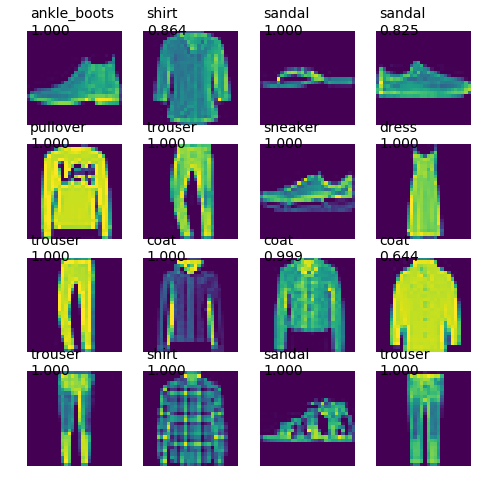

In [6]:
LABEL_NAMES = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']


cpu_model = create_model()
cpu_model.load_weights('./fashion_mnist.h5')

from matplotlib import pyplot
%matplotlib inline

def plot_predictions(images, predictions):
  n = images.shape[0]
  nc = int(np.ceil(n / 4))
  f, axes = pyplot.subplots(nc, 4)
  for i in range(nc * 4):
    y = i // 4
    x = i % 4
    axes[x, y].axis('off')
    
    label = LABEL_NAMES[np.argmax(predictions[i])]
    confidence = np.max(predictions[i])
    if i > n:
      continue
    axes[x, y].imshow(images[i])
    axes[x, y].text(0.5, 0.5, label + '\n%.3f' % confidence, fontsize=14)

  pyplot.gcf().set_size_inches(8, 8)  

plot_predictions(np.squeeze(x_test[:16]), 
                 cpu_model.predict(x_test[:16]))